In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_sample_image, make_blobs, load_files
import plotly.express as px
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import silhouette_samples, silhouette_score, classification_report, accuracy_score
import matplotlib.cm as cm
from numpy.random import multivariate_normal
from sklearn.mixture import GaussianMixture
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
dataset = pd.read_csv('Credit_card.csv')
dataset = dataset.fillna(dataset.mean())
dataset.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [3]:
columns = ['ID']
dataset.rename(columns={'default.payment.next.month': 'Type'}, inplace=True)
dataset = dataset.drop(columns, axis=1) 


In [4]:
dataset.rename(columns={'default.payment.next.month': 'Type'}, inplace=True)

In [5]:
dataset = dataset.iloc[:600]

In [6]:
feature_names = list(dataset.columns[:-1])

### PCA decomposition

In [8]:
X = dataset[feature_names]
reduced_pca = PCA(n_components=2).fit_transform(X)

In [9]:
fig = px.scatter(reduced_pca,
                 x=0, y=1,
                 labels={
                     "0": "Principal component 0",
                     "1": "Principal component 1"
                        },
                 title = 'PCA plot',
                 color=dataset['Type']).update(layout = dict(title = dict(x = 0.5)))
fig.show()

### TSNE decomposition

In [9]:
reduced_tsne = TSNE(n_components=2).fit_transform(X)

In [10]:
fig = px.scatter(reduced_tsne,
                 x=0, y=1,
                 labels={
                     "0": "Principal component 0",
                     "1": "Principal component 1"
                        },
                 title = 'PCA plot',
                 color=dataset['Type']).update(layout = dict(title = dict(x = 0.5)))
fig.show()

### Color Quantization using K-Means

In [11]:
from PIL import Image
im1 = Image.open('img.jpg')

In [12]:
fox = np.array(im1, dtype=np.float64) / 255

In [13]:
n_colors = [64, 32, 16, 8]

In [14]:
def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

image shape: (601, 745, 3)


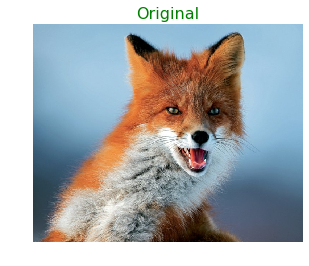

In [15]:
print('image shape:', fox.shape)
plt.axis('off')
plt.title(f'Original', color='g',fontsize=16)
plt.imshow(fox)
plt.show()

In [16]:
w, h, d = tuple(fox.shape)
image_array = np.reshape(fox, (w * h, d))

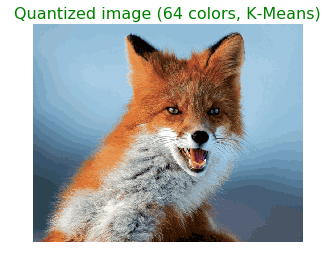

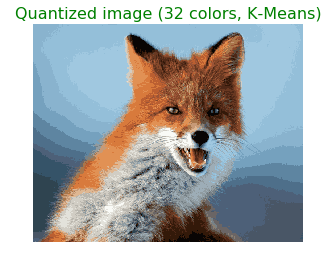

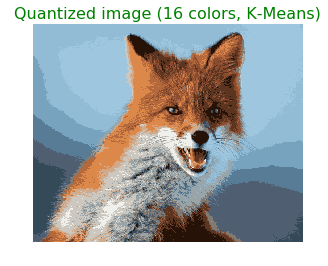

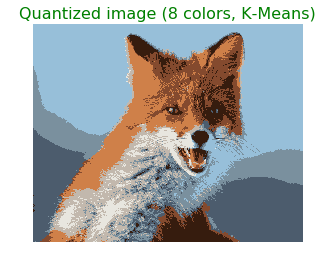

In [17]:
for it,n_color in enumerate(n_colors):
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_color, random_state=0).fit(image_array_sample)
    labels = kmeans.predict(image_array)
    plt.figure(it)
    plt.axis('off')
    plt.title(f'Quantized image ({n_color} colors, K-Means)', color='g',fontsize=16)
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

### Clustering Of Synthetic Data

In [18]:
X, y = make_blobs(n_samples=600,
                  n_features=4,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

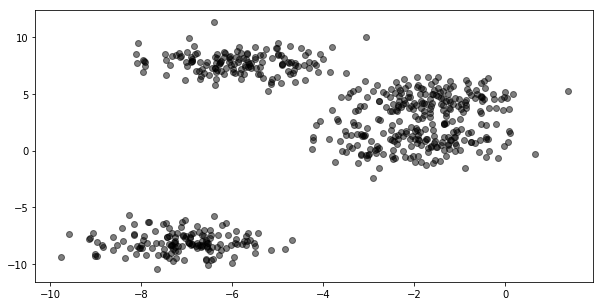

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, color = 'black')
plt.show()

In [20]:
centers=4
range_n_clusters = np.array([centers - 1, centers, centers + 1])

For n_clusters = 3 The average silhouette_score is : 0.6441717807096986
For n_clusters = 4 The average silhouette_score is : 0.7455562558010881
For n_clusters = 5 The average silhouette_score is : 0.6049566121608372


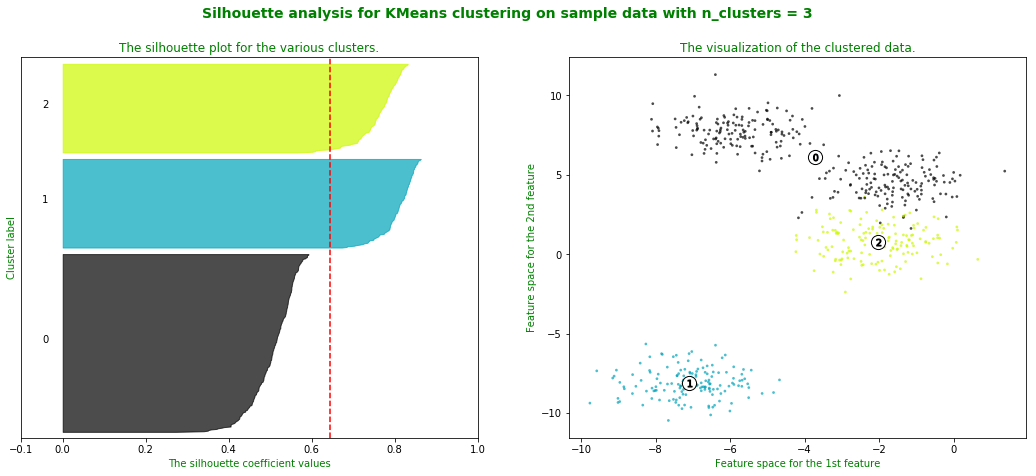

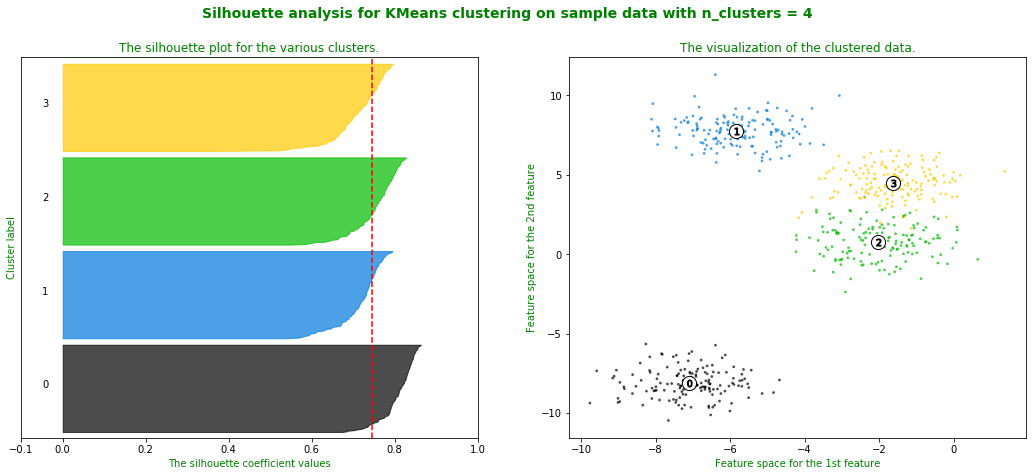

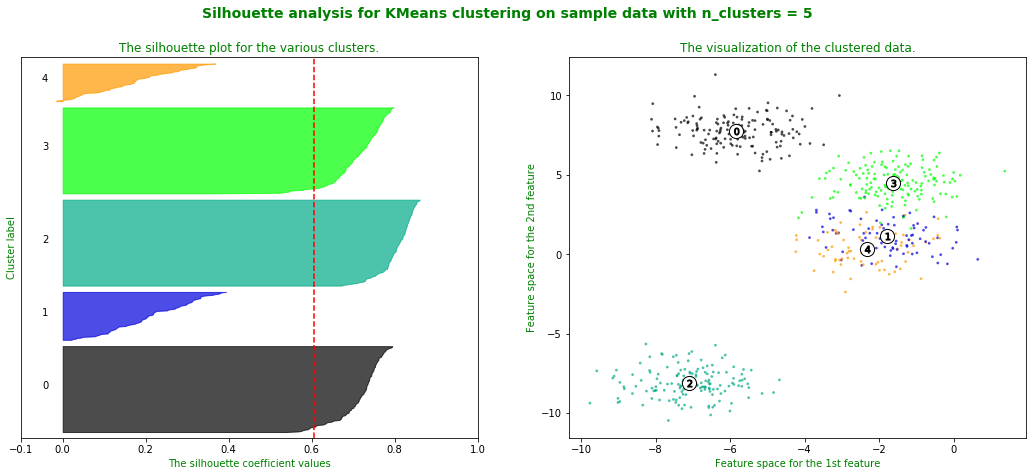

In [21]:
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # (b - a)/max(a, b)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 
    ax1.set_title("The silhouette plot for the various clusters.", color='g')
    ax1.set_xlabel("The silhouette coefficient values", color='g')
    ax1.set_ylabel("Cluster label", color='g')
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.", color='g')
    ax2.set_xlabel("Feature space for the 1st feature", color='g')
    ax2.set_ylabel("Feature space for the 2nd feature", color='g')
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters), color='g',
                 fontsize=14, fontweight='bold')

### EM Algorithm

In [22]:
mean1 = (1, 2)
cov1 = 3*np.identity(2)
X1 = multivariate_normal(mean1, cov1, 200)
mean2 = (7, 8)
cov2 = 4*np.identity(2)
X2 = multivariate_normal(mean2, cov2, 200)
X = np.concatenate([X1, X2])

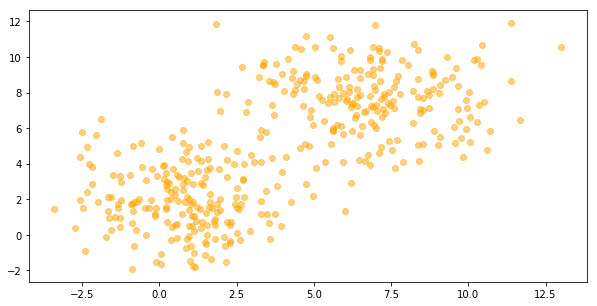

In [23]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, color = 'ORANGE')
plt.show()

In [24]:
clf = GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X)

GaussianMixture(n_components=2)

In [25]:
print('means\n',clf.means_)
print('weights\n',clf.weights_)
print('covariances\n',clf.covariances_)

means
 [[6.76099606 7.61759874]
 [0.79806302 1.96345919]]
weights
 [0.50787719 0.49212281]
covariances
 [[[ 4.65111967 -0.15098628]
  [-0.15098628  3.52665571]]

 [[ 2.88569772 -0.17756171]
  [-0.17756171  3.30929929]]]


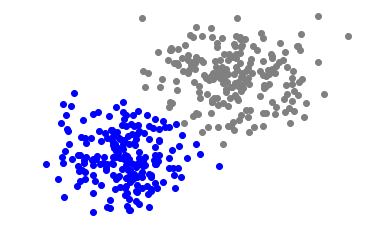

In [26]:
predicted = clf.predict(X)
color=['grey','blue']
for k in range(0,2):
    data = X[predicted==k]
    plt.scatter(data[:,0],data[:,1],c=color[k])
plt.axis('off')
plt.show()

In [27]:
data = pd.read_csv(r"Sheet_1.csv",encoding= "latin1" )
data.drop(["Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7",], axis = 1, inplace =True)
data = pd.concat([data["class"],data["response_text"]], axis = 1)
data.dropna(axis=0, inplace =True)
data.head()

class                                      response_text
0  not_flagged              I try and avoid this sort of conflict
1      flagged  Had a friend open up to me about his mental ad...
2      flagged  I saved a girl from suicide once. She was goin...
3  not_flagged  i cant think of one really...i think i may hav...
4  not_flagged  Only really one friend who doesn't fit into th...

In [28]:
data["class"] = [1 if each == "flagged" else 0 for each in data["class"]]
data.head(10)

class                                      response_text
0      0              I try and avoid this sort of conflict
1      1  Had a friend open up to me about his mental ad...
2      1  I saved a girl from suicide once. She was goin...
3      0  i cant think of one really...i think i may hav...
4      0  Only really one friend who doesn't fit into th...
5      0  a couple of years ago my friends was going to ...
6      1  Roommate when he was going through death and l...
7      1  i've had a couple of friends (you could say mo...
8      0  Listened to someone talk about relationship tr...
9      1  I will always listen. I comforted my sister wh...

In [29]:
X=data['response_text']
y=data['class']

In [30]:
vectorizer = CountVectorizer(token_pattern=r'(?u)\b[a-zA-Z]\w+\b',
                             ngram_range=(1, 2),
                             max_features=1500,
                             min_df=5,
                             max_df=0.7,
                             stop_words='english',
                             lowercase=True)
X = vectorizer.fit_transform(X).toarray()

In [31]:

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [33]:
classifier = RandomForestClassifier(n_estimators=1000, max_depth = 10, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=0)

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred))
print('accuracy:',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.67      0.50      0.57         4

    accuracy                           0.81        16
   macro avg       0.76      0.71      0.73        16
weighted avg       0.80      0.81      0.80        16

accuracy: 0.8125


In [36]:
text = ' '.join(vectorizer.get_feature_names())
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      random_state=1,
                      background_color='salmon',
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = STOPWORDS).generate(text)

(-0.5, 2999.5, 1999.5, -0.5)

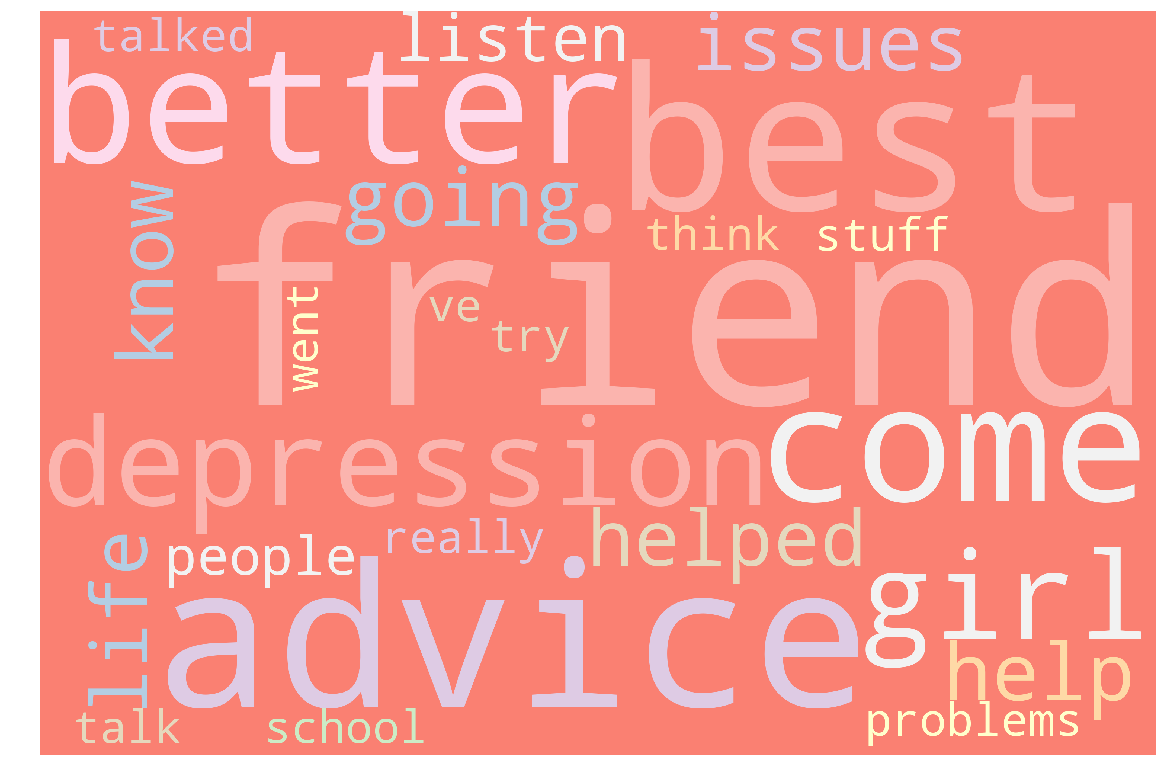

In [37]:
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud) 
plt.axis("off")